In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mean

In [91]:
sns.set_context("notebook", font_scale=1)
sns.set_style("whitegrid", {'font.family': 'serif', 'font.serif': ['Times New Roman']})

In [92]:
df = pd.read_csv("data.csv")

In [93]:
def get_pie(colName, dstFileName=None, chartTitle=None):
    colCount = df[colName].value_counts()
    
    plt.figure(figsize=(6, 6))
    colCount.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', title=chartTitle)
    if dstFileName:
        plt.savefig(dstFileName + ".png", dpi=300, bbox_inches='tight')
    plt.show()

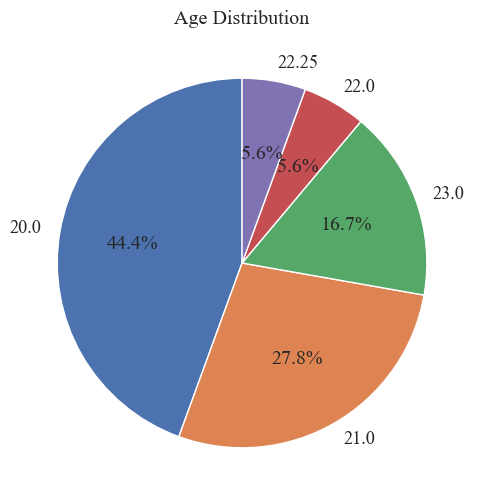

In [57]:
get_pie("What is your age?", "age_dist", "Age Distribution")

In [5]:
ages = df["What is your age?"]
print(ages.mean(), ages.std())

21.01388888888889 1.1519555694500234


In [94]:
toDrop = ["Name (First and Last)", "Timestamp", "What is your age?", "What gender do you identify as?"]
for colName in toDrop:
    try:
        df.drop(colName, axis=1, inplace=True)
    except:
        print(colName, "not found")
        continue

In [7]:
expected_res = {
    "Question 1. What year did the American Revolution begin?": 1775,
    "Question 2. Who was the primary author of the Declaration of Independence?": "Thomas Jefferson",
    'Question 3. Which event marked the end of the American Civil War?': "Surrender at Appomattox Court House",
    'Question 4. What was the purpose of the Monroe Doctrine?': "To warn European powers against colonization in the Americas",
    'Question 5. Which U.S. President issued the Emancipation Proclamation?': "Abraham Lincoln",
    'Question 6. What was the main cause of the Great Depression?': "Stock market crash of 1929",
    'Question 7. Who was the Vice President during George Washington’s presidency?': "John Adams",
    'Question 8. What was the significance of the Louisiana Purchase?': "It doubled the size of the United States",
    'Question 9. Which battle was considered a turning point in the American Revolutionary War?': "Battle of Saratoga",
    'Question 10. Who was known as the “Father of the Constitution”?': "James Madison",
    'Question 11. Which event directly led to the U.S. entering World War II?': "The bombing of Pearl Harbor",
    'Question 12. What was the purpose of the Homestead Act of 1862?': "To encourage westward settlement",
    'Question 13. Who signed the Treaty of Versailles on behalf of the United States?': "No one; the U.S. did not sign the treaty",
    'Question 14. Why did Thomas Edison serve as a military advisor during the Civil War?': "He did not serve in the Civil War",
    'Question 15. What was the primary reason for the Boston Tea Party?': "To protest taxation without representation",
    'Question 16. What year did the United States declare independence?': 1776,
    'Question 17. What was the main cause of the Salem Witch Trials?': "Religious and social hysteria",
    'Question 18. Which event marked the start of the American Civil War?': "The firing on Fort Sumter"
}

In [8]:
def get_accuracy(df):
    total_possible = 36
    count0, count1, count2 = 0, 0, 0
    for i, k in enumerate(expected_res):
        if i < 6:
            count0 += len(df[df[k] == expected_res[k]])
        elif i < 12:
            count1 += len(df[df[k] == expected_res[k]])
        else:
            count2 += len(df[df[k] == expected_res[k]])
    print(round(count0 / total_possible, 2), round(count1 / total_possible, 2), round(count2 / total_possible, 2))

In [95]:
tailored = df[:6]
standard = df[6:12]
none = df[12:]

In [10]:
get_accuracy(none)

1.0 0.56 0.64


In [11]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

                   No Hallucination  Low Hallucination  High Hallucination
Tailored Warnings              1.00               0.89                0.81
Standard Warnings              0.97               0.81                0.69
No Warnings                    1.00               0.64                0.56


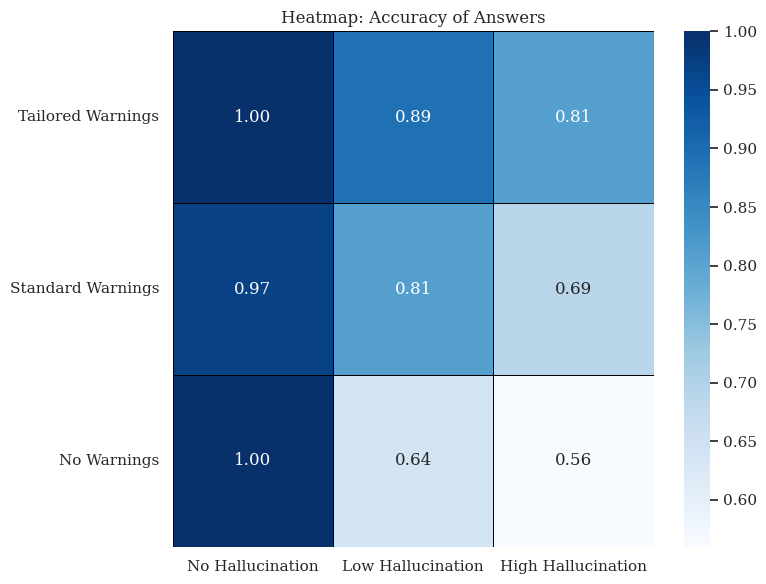

In [43]:
acc = [
    [1.0, 0.89, 0.81],
    [0.97, 0.81, 0.69],
    [1.0, 0.64, 0.56]
]
rows = ['Tailored Warnings', 'Standard Warnings', 'No Warnings']
columns = ['No Hallucination', 'Low Hallucination', 'High Hallucination']

accDf = pd.DataFrame(acc, index=rows, columns=columns)
print(accDf)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(accDf, annot=True, fmt=".2f", cmap="Blues", cbar=True, linewidths=0.5, linecolor="black")

# for spine in ax.spines.values():
#     spine.set_edgecolor('black')
#     spine.set_linewidth(1)
    
plt.title("Heatmap: Accuracy of Answers")
# plt.xlabel("Hallucination Level")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("./heatmap_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

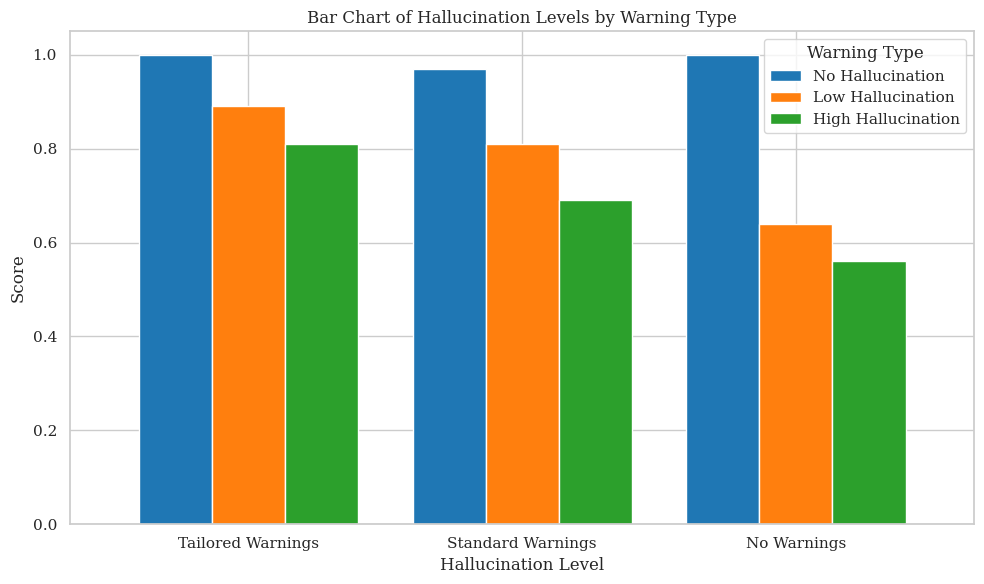

In [39]:
# Generate a bar chart for comparison
accDf.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Bar Chart of Hallucination Levels by Warning Type")
plt.xlabel("Hallucination Level")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Warning Type")
plt.tight_layout()
plt.savefig("./bar_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
tailored_familiarity = mean(tailored["How familiar are you with the topic of U.S. history?"])
standard_familiarity = mean(standard["How familiar are you with the topic of U.S. history?"])
none_familiarity = mean(none["How familiar are you with the topic of U.S. history?"])
print(tailored_familiarity, standard_familiarity, none_familiarity)

2.5 3.6666666666666665 3.3333333333333335


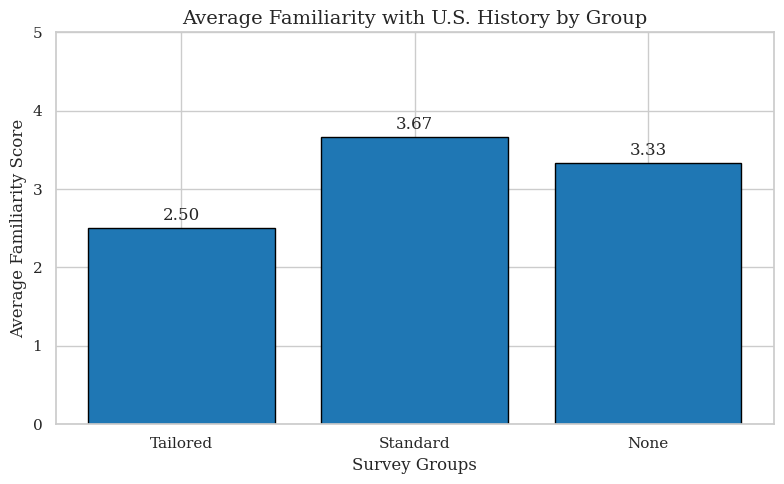

In [48]:
categories = ["Tailored", "Standard", "None"]
familiarity_scores = [2.50, 3.67, 3.33]

plt.figure(figsize=(8, 5))
plt.bar(categories, familiarity_scores, edgecolor='black')

plt.title("Average Familiarity with U.S. History by Group", fontsize=14)
plt.xlabel("Survey Groups")
plt.ylabel("Average Familiarity Score", fontsize=12)
plt.ylim(0, 5)  

for i, score in enumerate(familiarity_scores):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center')

plt.tight_layout()
plt.savefig("./bar_familiarity.png", dpi=300, bbox_inches='tight')
plt.show()

In [58]:
none["How much did you trust the RAG interface to provide accurate information?"].mean()

2.5

In [ ]:
# everyone noticed errors/hallucinations

# how much you trusted RAG to provide accurate info: 
"""
tailored: 3.17
standard: 2.5
none: 2.5
"""

In [71]:
none['Was the interface easy to use and understand?'].mean()

4.5

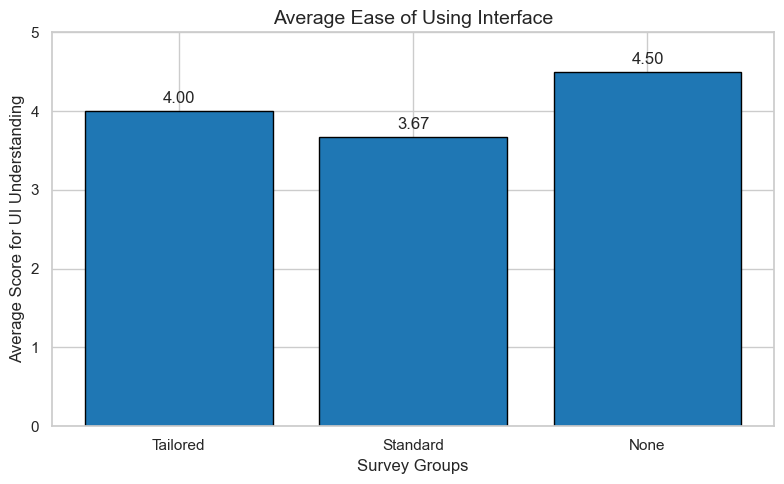

In [80]:
# Interface easy to understand: 4.0, 3.67, 4.5 (t s n)


categories = ["Tailored", "Standard", "None"]
scores = [4.0, 3.67, 4.5]

plt.figure(figsize=(8, 5))
plt.bar(categories, scores, edgecolor='black')

plt.title("Average Ease of Using Interface", fontsize=14)
plt.xlabel("Survey Groups")
plt.ylabel("Average Score for UI Understanding", fontsize=12)
plt.ylim(0, 5)

for i, score in enumerate(scores):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center')


plt.tight_layout()
plt.savefig("./bar_easeToUse.png", dpi=300, bbox_inches='tight')
plt.show()

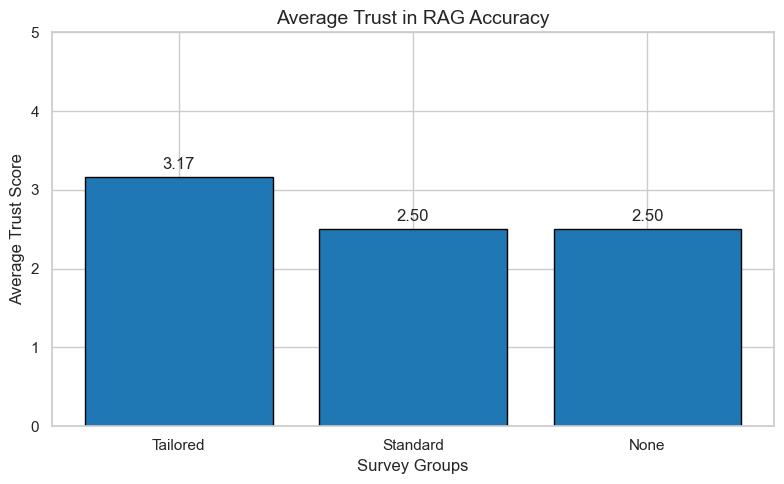

In [66]:
categories = ["Tailored", "Standard", "None"]
scores = [3.17, 2.5, 2.5]

plt.figure(figsize=(8, 5))
plt.bar(categories, scores, edgecolor='black')

plt.title("Average Trust in RAG Accuracy", fontsize=14)
plt.xlabel("Survey Groups")
plt.ylabel("Average Trust Score", fontsize=12)
plt.ylim(0, 5)

for i, score in enumerate(scores):
    plt.text(i, score + 0.1, f"{score:.2f}", ha='center')

plt.tight_layout()
plt.savefig("./bar_trustInModel.png", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
standard

[1.67, 2.0, 3.67]

In [77]:
tailored['If you had warning messages: How helpful did you find the warning messages in detecting inaccuracies in the responses?'].mean()

4.0

In [78]:
standard['If you had warning messages: How helpful did you find the warning messages in detecting inaccuracies in the responses?'].mean()

2.0

In [85]:
# Data
q = [
    'How much did you rely on the warning messages when evaluating the responses?',
    'How helpful did you find the warning messages in detecting hallucinations?',
    'How easy was the interface to understand?'
]
t = [3.50, 4.00, 4.00]
s = [1.67, 2.00, 3.67]
n = [None, None, 4.50] 

df = pd.DataFrame({
    'Question': q,
    'Tailored Warnings': t,
    'Standard Warnings': s,
    'No Warnings': n
})

df_transposed = df.T

df_transposed.columns = df_transposed.iloc[0] 
df_transposed = df_transposed[1:]
df_transposed

Question,How much did you rely on the warning messages when evaluating the responses?,How helpful did you find the warning messages in detecting hallucinations?,How easy was the interface to understand?
Tailored Warnings,3.5,4.0,4.0
Standard Warnings,1.67,2.0,3.67
No Warnings,NaN,NaN,4.5


In [102]:
num_tailored = tailored.select_dtypes(include=['number'])
num_standard = standard.select_dtypes(include=['number'])
num_none = none.select_dtypes(include=['number'])
avgDf = pd.DataFrame([round(num_tailored.mean(), 2), round(num_standard.mean(), 2), round(num_none.mean(), 2)])
avgDf.index = ['Tailored', 'Standard', 'No Warnings']

In [103]:
avgDf

,How familiar are you with the topic of U.S. history?,"Prior to this study, how frequently have you used AI-based systems for educational purposes (e.g., question answering, tutoring)?",How confident are you in your ability to detect historical inaccuracies or biases without external tools?,Question 1. What year did the American Revolution begin?,Question 1: How accurate did you find the system-generated response?,Question 2: How accurate did you find the system-generated response?,Question 3: How accurate did you find the system-generated response?,Question 4: How accurate did you find the system-generated response?,Question 5: How accurate did you find the system-generated response?,Question 6: How accurate did you find the system-generated response?,...,Question 14: How accurate did you find the system-generated response?,Question 15: How accurate did you find the system-generated response?,Question 16. What year did the United States declare independence?,Question 16: How accurate did you find the system-generated response?,Question 17: How accurate did you find the system-generated response?,Question 18: How accurate did you find the system-generated response?,If you had warning messages: How helpful did you find the warning messages in detecting inaccuracies in the responses?,If you had warning messages: How much did you rely on the warning messages when evaluating the responses?,How much did you trust the RAG interface to provide accurate information?,Was the interface easy to use and understand?
Tailored,2.50,2.00,2.50,1775.0,4.67,5.00,4.83,4.67,5.00,4.50,...,2.00,2.83,1776.00,2.17,2.17,2.67,4.0,3.50,3.17,4.00
Standard,3.67,4.00,2.83,1775.0,4.33,4.33,4.33,4.50,4.67,4.17,...,1.00,1.17,1778.33,1.17,1.17,1.33,2.0,1.67,2.50,3.67
No Warnings,3.33,3.83,2.17,1775.0,4.50,4.33,4.17,4.50,4.17,4.33,...,1.83,2.67,1777.00,2.17,1.33,1.67,NaN,NaN,2.50,4.50
